# SALES PREDICTION

##### loading all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##### loading the dataset

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##### getting the shape of the data

In [4]:
data.shape

(200, 4)

##### displaying columns of the data

In [5]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

##### displaying the data types of the columns in the dataset

In [6]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### lets get the description of the data

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### lest get the information about the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##### lets create a boxplot to find outliers in data

In [10]:
@interact(x_data=['TV','Radio','Newspaper'])
def outlier(x_data):
    if x_data=='TV':
        plt.boxplot(x='TV',data=data)
    elif x_data=='Radio':
        plt.boxplot(x='Radio',data=data)
    elif x_data=='Newspaper':
        plt.boxplot(x='Newspaper',data=data)
    plt.title(f'{x_data} plot')
    plt.xlabel(x_data)
    plt.ylabel('Sales')

interactive(children=(Dropdown(description='x_data', options=('TV', 'Radio', 'Newspaper'), value='TV'), Output…

##### lets craete a heatmap to find correlation

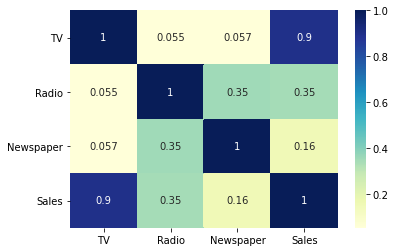

In [11]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### lets create a interactive model to find the relationship between the type of advertisement compared to the sales

In [12]:
@interact(x_data=data.columns)
def analysis(x_data):
    if x_data=='TV':
        plt.scatter(x='TV',y='Sales',data=data)
    elif x_data=='Radio':
        plt.scatter(x='Radio',y='Sales',data=data)
    elif x_data=='Newspaper':
        plt.scatter(x='Newspaper',y='Sales',data=data)
    plt.title(f'{x_data} v/s Sales')
    plt.xlabel(x_data)
    plt.ylabel('Sales')

interactive(children=(Dropdown(description='x_data', options=('TV', 'Radio', 'Newspaper', 'Sales'), value='TV'…

##### MODEL CREATION

In [13]:
x=data[['TV','Radio','Newspaper']]

In [14]:
y=data['Sales']

##### splitting the data into training and testing set

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
prediction=lr.predict(x_test)

In [19]:
mse=np.sqrt(mean_squared_error(y_test,prediction))

In [20]:
print('The Mean Sqaure Error is : ',mse)

The Mean Sqaure Error is :  1.4107402196670455


In [21]:
r2=r2_score(y_test,prediction)

In [22]:
print('The r2 score is : ',r2)

The r2 score is :  0.9148706512256517


In [23]:
mae=mean_absolute_error(y_test,prediction)

In [24]:
print('The Mean Absolute Error is : ',mae)

The Mean Absolute Error is :  1.0436595481340785
